In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep

%matplotlib inline

In [5]:
data_path = '../scrape-capterra/scraped_data/data.json'
df = pd.read_json(data_path)

In [6]:
def extract_reactions(df):
    data = {}

    reviews_for_lms = df['reviews']
    for reviews in reviews_for_lms:
        sleep(0.1)
        for review in reviews:
            reaction = review['reactions']
            reaction_types = reaction.keys()
            
            for key in reaction_types:
                if key.strip() in data.keys():
                    data[key.strip()].append(reaction[key])
                else:
                    data[key.strip()] = [reaction[key]]
    return data


reaction_data = extract_reactions(df)

In [7]:
reaction_data.keys()

dict_keys(['Cons', '', 'Overall', 'Pros', 'Recommendations to other buyers', 'Comments'])

In [11]:
import string
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arjunray/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/arjunray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/arjunray/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/arjunray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [36]:
def freq_tokens_for_n_grams(data_dict, key, n=1):
    print(key, n)
    tokens = nltk.word_tokenize(' '.join(reaction_data[key]))
    non_stopwords = [ 
#         'no', 
#         'too', 
#         'nor', 
#         'not', 
#         'don\'t',      
#         "aren't",
#         "couldn't",
#         "didn't",
#         "doesn't",
#         "hadn't",
#         "hasn't",
#         "haven't",
#         "isn't",             
#         "shouldn't",
#         "wasn't",
#         "weren't",
#         "won't",
#         "wouldn't",
    ]
    default_stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)
    default_stopwords = [word for word in default_stopwords if word not in non_stopwords]

    lemmatizer = WordNetLemmatizer()

    tokens = [word for word in tokens if word not in default_stopwords]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if len(word) > 3]
    tokens = ngrams(tokens, n)
    
    return FreqDist(tokens)

In [40]:
data = {}

for key in ['Cons', 'Pros']:
    data[key] = {}
    for n in range(1, 10):
        freq_dist = freq_tokens_for_n_grams(reaction_data, key, n)
        data[key][n] = list(freq_dist.most_common())[0:50]

Cons 1
Cons 2
Cons 3
Cons 4
Cons 5
Cons 6
Cons 7
Cons 8
Cons 9
Pros 1
Pros 2
Pros 3
Pros 4
Pros 5
Pros 6
Pros 7
Pros 8
Pros 9


In [44]:
data['Cons'][3]

[(('what', 'like', 'least'), 24),
 (('would', 'like', 'able'), 16),
 (('learning', 'management', 'system'), 14),
 (('take', 'long', 'time'), 10),
 (('take', 'time', 'learn'), 9),
 (('like', 'least', 'software'), 9),
 (('steep', 'learning', 'curve'), 8),
 (('there', 'learning', 'curve'), 7),
 (('would', 'also', 'like'), 7),
 (('first', 'time', 'user'), 7),
 (('thing', 'like', 'least'), 6),
 (('user', 'interface', 'user'), 6),
 (('would', 'like', 'flexibility'), 6),
 (('there', 'nothing', 'like'), 6),
 (('adobe', 'captivate', 'prime'), 5),
 (('like', 'least', 'moodle'), 5),
 (('thing', 'would', 'like'), 4),
 (('take', 'getting', 'used'), 4),
 (('customer', 'service', 'team'), 4),
 (('sometimes', 'hard', 'find'), 4),
 (('little', 'confusing', 'first'), 4),
 (('guide', 'need', 'updated'), 4),
 (('interface', 'user', 'friendly'), 4),
 (('would', 'nice', 'could'), 4),
 (('there', 'really', 'anything'), 4),
 (('time', 'using', 'software'), 4),
 (('take', 'little', 'time'), 4),
 (('also', 'wou

In [47]:
data['Cons'][5]

[(('what', 'like', 'least', 'edmodo', 'sometimes'), 3),
 (('canvas', 'would', 'like', 'reporting', 'depth'), 2),
 (('little', 'thing', 'impact', 'admin', 'user'), 2),
 (('noticeboard', 'easily', 'edited', 'discard', 'recompose'), 2),
 (('customize', 'company', 'specific', 'need', 'could'), 2),
 (('ability', 'export', 'data', 'need', 'without'), 2),
 (('worst', 'seen', 'system', 'great', 'design'), 2),
 (('learning', 'setup', 'phase', 'implementation', 'litmos'), 2),
 (('colleague', 'litmos', 'picked', 'asap', 'thanks'), 2),
 (('should', 'improved', 'feature', 'requires', 'admins'), 2),
 (('question', 'level', 'reporting', 'much', 'manual'), 2),
 (('picked', 'preview', 'section', 'training', 'would'), 2),
 (('training', 'software', 'training', 'provided', 'presentation'), 2),
 (('customization', 'color', 'change', 'lack', 'notification'), 2),
 (('user', 'module', 'directly', 'core', 'system'), 2),
 (('along', 'none', 'litmos', 'provide', 'feature'), 2),
 (('log-on', 'page', 'except', 'c

In [128]:
with open('./word_frequency.json', 'w') as f:
    f.write(json.dumps(data, indent=2)) 

In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [51]:
def sentiment_analysis(corpus):
    sia = SIA()
    results = []

    for text in corpus:
        reactions_score = sia.polarity_scores(text)
        reactions_score['text'] = text
        results.append(reactions_score)
    
    return results

In [52]:
def sentiment_stats(data_dict, keys):
    results = {}
    
    for key in keys:
        sentiment_scores = sentiment_analysis(data_dict[key])
        results[key] = {
            'sentiment_scores': sentiment_scores,
            'average_scores': {
                'pos': sum([score['pos'] for score in sentiment_scores]) / len(sentiment_scores),
                'neg': sum([score['neg'] for score in sentiment_scores]) / len(sentiment_scores),
                'neu': sum([score['neu'] for score in sentiment_scores]) / len(sentiment_scores),
            }
           
        }
    return results

In [53]:
sentiment_stats = sentiment_stats(reaction_data, ['Pros', 'Cons'])

In [54]:
print(sentiment_stats['Pros']['average_scores'])
print(sentiment_stats['Cons']['average_scores'])

{'pos': 0.22010572175428428, 'neu': 0.7673891954690677, 'neg': 0.009602672088295091}
{'pos': 0.09648118518518524, 'neu': 0.8333952592592594, 'neg': 0.06805777777777786}


In [55]:
df = pd.DataFrame({'Pros': sentiment_stats['Pros']['average_scores'], 'Cons': sentiment_stats['Cons']['average_scores']}).T
df = df.reset_index()

In [56]:
import seaborn as sns

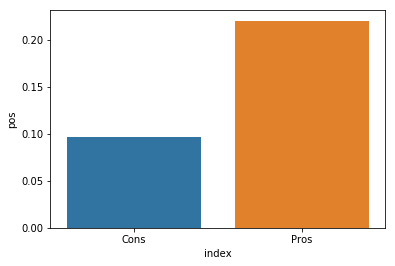

In [57]:
sns.barplot(x='index', y='pos', data=df)

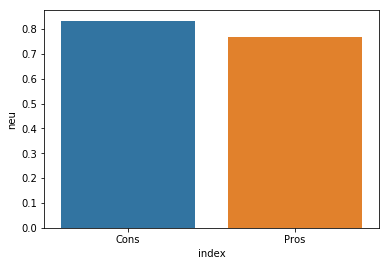

In [58]:
sns.barplot(x='index', y='neu', data=df)

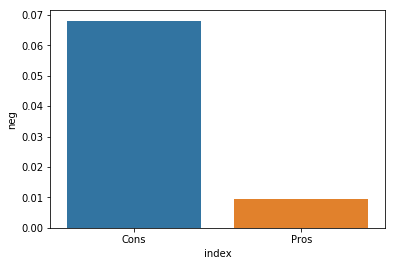

In [59]:
sns.barplot(x='index', y='neg', data=df)

In [ ]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [106]:
def sort_and_filter_sentiments(sentiment_list, key, min_text_len=0):
    sorted_sentiments = sorted(sentiment_list, key=lambda x: x[key])
    sorted_sentiments = list(reversed(sorted_sentiments))
    sorted_sentiments = list(filter(lambda x: len(x['text']) >= min_text_len, sorted_sentiments))
    return sorted_sentiments

def sort_all_sentiments(sentiment_stats, min_text_len):
    results = {}
    
    for sentiment_type in ['Pros', 'Cons']:
        
        results[sentiment_type] = {}

        for valence in ['pos', 'neu', 'neg']:
            
            sentiments_list = sentiment_stats[sentiment_type]['sentiment_scores']
            sorted_sentiments = sort_and_filter_sentiments(sentiments_list, valence, min_text_len)
            print(sentiment_type, valence)
            results[sentiment_type][valence] = sorted_sentiments
    return results

sorted_sentiment_data = sort_all_sentiments(sentiment_stats, 80)

Pros pos
Pros neu
Pros neg
Cons pos
Cons neu
Cons neg


In [109]:
sorted_sentiment_data['Pros']['pos']

[{'compound': 0.946,
  'neg': 0.0,
  'neu': 0.342,
  'pos': 0.658,
  'text': ' free (open source), flexible Course Management System, great community support, robust and easy to use'},
 {'compound': 0.9511,
  'neg': 0.0,
  'neu': 0.371,
  'pos': 0.629,
  'text': ' Very user friendly - very intuitive - very easy of use - very good pricing model - great support       '},
 {'compound': 0.9477,
  'neg': 0.0,
  'neu': 0.386,
  'pos': 0.614,
  'text': ' The UI is user friendly and easy to use. The help videos are a great asset as well.  '},
 {'compound': 0.9316,
  'neg': 0.0,
  'neu': 0.393,
  'pos': 0.607,
  'text': ' Improved classroom engagement, parent engagement, overall student performance. WOW  is all I can say!'},
 {'compound': 0.9442,
  'neg': 0.0,
  'neu': 0.406,
  'pos': 0.594,
  'text': ' Customer support is amazing and super responsive. The platform is user and mobile  friendly and intuitive'},
 {'compound': 0.9442,
  'neg': 0.0,
  'neu': 0.406,
  'pos': 0.594,
  'text': ' Custo

In [129]:
with open('./sorted_sentiments.json', 'w') as f:
    f.write(json.dumps(sorted_sentiment_data, indent=2)) 

In [111]:
from gensim.models import Word2Vec
from gensim.models import Phrases

In [116]:
texts = reaction_data['Pros']
texts = [sentence.lower()
                 .strip()
                 .replace('\n', ' ')
                 .replace('\\', ' ')
                 .replace('/', ' ')
                 .split(' ') for sentence in texts]
cleaned_texts = []
for sentence in texts:
    sentence = [word for word in sentence if len(word) > 0]
    sentence = [word for word in sentence if word not in default_stopwords]
    cleaned_texts.append(sentence)

In [123]:
#     tokens = [word for word in tokens if word not in stopwords]
# #     tokens = [lemmatizer.lemmatize(word) for word in tokens]
#     tokens = [word.lower() for word in tokens]
#     tokens = [word for word in tokens if len(word) > 3]
#     tokens = ngrams(tokens, n)

bigram_transformer = Phrases(cleaned_texts)
word2vec = Word2Vec(cleaned_texts, size=100, window=10, min_count=3, workers=4)  
word2vec.train(cleaned_texts, total_examples=len(cleaned_texts), epochs=10)


(486620, 616890)

In [127]:
word2vec.wv.most_similar('learning', topn=100)

[('lms', 0.988120436668396),
 ('known', 0.9876384139060974),
 ('free', 0.9837557673454285),
 ('open', 0.9835967421531677),
 ('source', 0.9835353493690491),
 ('system', 0.9798987507820129),
 ('management', 0.9796702861785889),
 ('features', 0.9761168360710144),
 ('(lms)', 0.9732797741889954),
 ('adobe', 0.972476065158844),
 ('captivate', 0.9711300134658813),
 ('users', 0.9684708118438721),
 ('prime', 0.9680370688438416),
 ('deploying', 0.9678971171379089),
 ('many', 0.9638842940330505),
 ('community', 0.961837887763977),
 ('market.', 0.9582812786102295),
 ('curve', 0.9565298557281494),
 ('best', 0.9552519917488098),
 ('primarily', 0.9534604549407959),
 ('systems', 0.9533045291900635),
 ('moodle', 0.9523351788520813),
 ('(lms).', 0.9508933424949646),
 ('options', 0.9484168291091919),
 ('good', 0.9466631412506104),
 ('offers', 0.9447174072265625),
 ('software.', 0.9437875747680664),
 ('support', 0.9432746767997742),
 ('lot', 0.943261981010437),
 ('excellent.', 0.943004310131073),
 ('true'

In [126]:
len(word2vec.wv.vocab.keys())

2893